# NeuNetsのモデル表示

In [ ]:
!pip install pydot==1.2.3

In [ ]:
!pip install pyparsing==2.2.0

In [ ]:
!pip install h5py==2.8.0

In [ ]:
!conda install graphviz -y

In [1]:
from keras.models import load_model
model = load_model('../model/keras_model.hdf5')

Using TensorFlow backend.


In [2]:
from keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plot_model(model, to_file='neunets-model.png', show_shapes=True, show_layer_names=True)

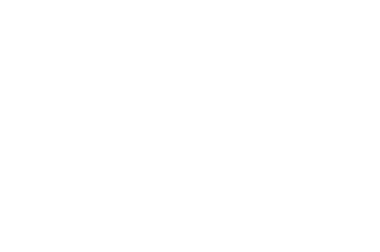

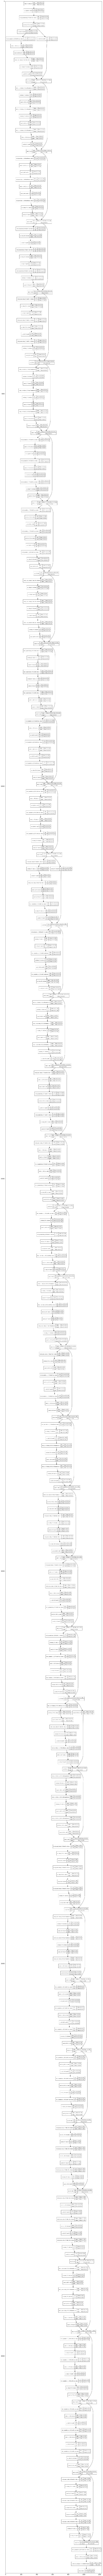

In [5]:
im = Image.open('neunets-model.png')
plt.axis('off')
plt.figure(figsize=(20,400))
plt.imshow(np.array(im))
plt.show()

In [ ]:
# 精度評価
import numpy as np
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x = x_test/255.0
mean = np.mean(x)
std = np.std(x)
x = (x - mean)/std
yt = y_test.ravel()
predict = model.predict(x)
yp = np.argmax(predict, axis=1).ravel()
from sklearn.metrics import classification_report
print(classification_report(yt, yp))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yt, yp))